# Исследование объявлений о продаже квартир

# Описание проекта

Данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Требуется определить рыночную стоимость объектов недвижимости. Для этого провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


# Описание данных

1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — общая площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении


## Откройте файл с данными и изучите общую информацию

### Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Изучите общую информацию о полученном датафрейме

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод:** 23699 строк, 22 столбца, можно сразу увидеть, что присутствуют пропуски в данных. Названия некоторых колонн требуется изменить. Также в некоторых столбцах требуется изменить тип данных.

### Постройте гистограмму для всех числовых столбцов таблицы на одном графике

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

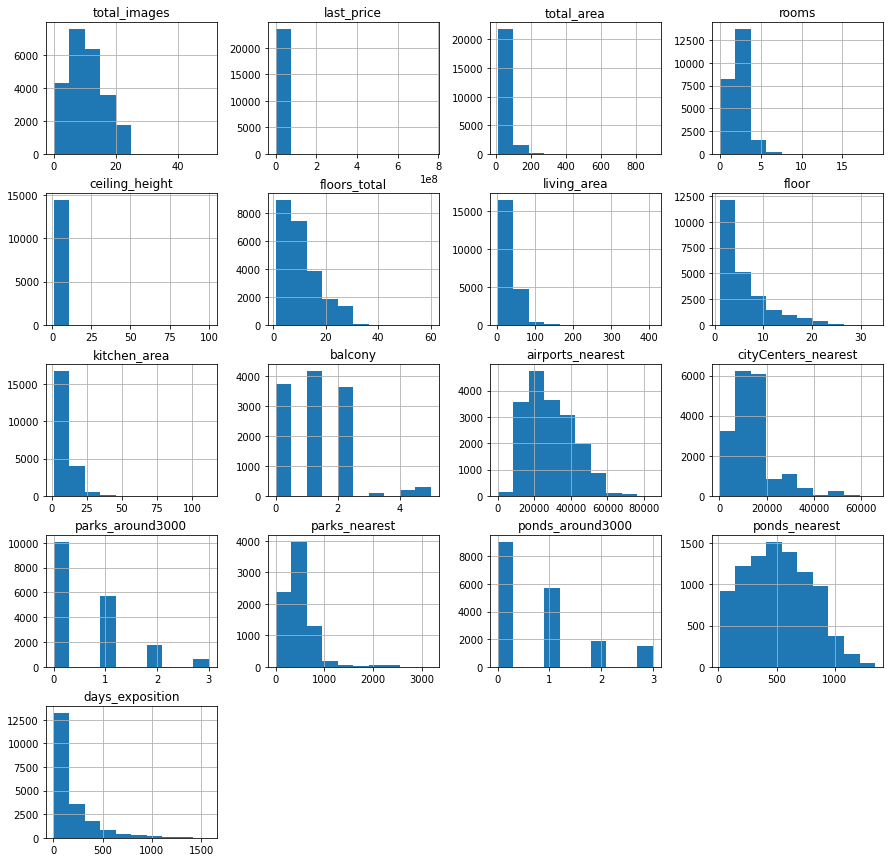

In [4]:
data.hist(figsize=(15, 15))

**Вывод:** Рассмотрев гистограммы можно отметить некоторую очевидную информацию. Количество комнат в больше степени от 0 до 4, количество этажей в большей степени не больше 20, жил. площадь не более 50 кв. м.

## Выполните предобработку данных

### Найдите и изучите пропущенные значения в столбцах

#### Определите, в каких столбцах есть пропуски

In [5]:
data.isna().sum() # выведем количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполните пропущенные значения там, где это возможно

**Вывод:** Пропусков достаточно много.
1. Высота потолков (ceiling_height) - 9195. Можно заменить на медианное значение.
2. Всего этажей в доме (floors_total) - 86. Можно заменить на медианное значение.
3. Жилая площадь в квадратных метрах (м²) (living_area) - 1903. Оставим без изменений. На анализ не повлияет.
4. Апартаменты (булев тип) is_apartment - 20924. Скорее всего означает False. Заменим на False.
5. Площадь кухни в квадратных метрах (м²) (kitchen_area) - 2278. Скорее всего кухни нет, заменим на 0.
6. Число балконов (balcony) - 11519. Балконов скорее всего нет, заменим на 0.
7. Название населённого пункта (locality_name) - 49. Рассмотрим подробнее. Пока оставим без изменений.
8. Расстояние до ближайшего аэропорта в метрах (м) (airports_nearest) - 5542. Скорее всего, что рядом нет, заменим на 0.
9. Расстояние до центра города (м) (cityCenters_nearest) - 5519. Оставим без изменений.
10. Число парков в радиусе 3 км (parks_around3000) - 5518. Скорее всего, что рядом нет, заменим на 0.
11. Расстояние до ближайшего парка (м) (parks_nearest) - 15620. Скорее всего, что рядом нет. Оставим без изменений.
12. Число водоёмов в радиусе 3 км (ponds_around3000) - 5518. Скорее всего, что рядом нет, заменим на 0.
13. Расстояние до ближайшего водоёма (м) (ponds_nearest) - 14589. Скорее всего, что рядом нет. Оставим без изменений.
14. Сколько дней было размещено объявление (от публикации до снятия) (days_exposition) - 3181. Оставим без изменений.

Заменим названия столбцов для удобства:

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['is_apartment'] = data['is_apartment'].fillna(False)
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)


In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Рассмотрите типы данных в каждом столбце

#### Найдите столбцы, в которых нужно изменить тип данных

In [9]:
data.info() # рассмотрим еще раз типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

floors_total поменять на int, first_day_exposition на временной тип, last_price на int.

#### Преобразуйте тип данных в выбранных столбцах

In [10]:
data['floors_total'] = data['floors_total'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты

In [12]:
data['locality_name'] = data['locality_name'].str.lower()

In [13]:
data.duplicated().sum() # проверим наличие явных дубликатов

0

In [14]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [15]:
data['locality_name'] = data['locality_name'].replace('городской поселок янино-1', 'посёлок янино-1')
data['locality_name'] = data['locality_name'].replace('мурино', 'посёлок мурино')
data['locality_name'] = data['locality_name'].replace('поселок мурино', 'посёлок мурино')
data['locality_name'] = data['locality_name'].replace('деревня кудрово', 'кудрово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа красный бор', 'посёлок красный бор')
data['locality_name'] = data['locality_name'].replace('городской посёлок фёдоровское', 'посёлок фёдоровское')
data['locality_name'] = data['locality_name'].replace('деревня фёдоровское', 'посёлок фёдоровское')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа лебяжье', 'посёлок лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок городского типа лебяжье', 'посёлок лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок городского типа кузьмоловский', 'посёлок кузьмоловский')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа кузьмоловский', 'посёлок кузьмоловский')
data['locality_name'] = data['locality_name'].replace('поселок аннино', 'посёлок аннино')
data['locality_name'] = data['locality_name'].replace('поселок новый свет', 'посёлок новый свет')
data['locality_name'] = data['locality_name'].replace('поселок бугры', 'посёлок бугры')
data['locality_name'] = data['locality_name'].replace('поселок городского типа рощино', 'посёлок рощино')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа рощино', 'посёлок рощино')
data['locality_name'] = data['locality_name'].replace('городской посёлок рощино', 'посёлок рощино')
data['locality_name'] = data['locality_name'].replace('городской посёлок павлово', 'посёлок павлово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа павлово', 'посёлок павлово')
data['locality_name'] = data['locality_name'].replace('поселок победа', 'посёлок победа')
data['locality_name'] = data['locality_name'].replace('поселок терволово', 'посёлок терволово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа советский', 'посёлок советский')
data['locality_name'] = data['locality_name'].replace('городской посёлок советский', 'посёлок советский')
data['locality_name'] = data['locality_name'].replace('поселок петровское', 'посёлок петровское')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа токсово', 'посёлок токсово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа токсово', 'посёлок токсово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа вырица', 'посёлок городского типа вырица')
data['locality_name'] = data['locality_name'].replace('поселок тельмана', 'посёлок тельмана')
data['locality_name'] = data['locality_name'].replace('городской поселок большая ижора', 'поселок городского типа большая ижора')
data['locality_name'] = data['locality_name'].replace('поселок городского типа лесогорский', 'городской посёлок лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок городского типа имени свердлова', 'посёлок городского типа имени свердлова')
data['locality_name'] = data['locality_name'].replace('поселок рябово', 'посёлок рябово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа рябово', 'посёлок рябово')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа рябово', 'посёлок рябово')
data['locality_name'] = data['locality_name'].replace('поселок поляны', 'посёлок поляны')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа мга', 'городской посёлок мга')
data['locality_name'] = data['locality_name'].replace('поселок мичуринское', 'посёлок мичуринское')
data['locality_name'] = data['locality_name'].replace('поселок ильичёво', 'посёлок ильичёво')
data['locality_name'] = data['locality_name'].replace('поселок станции вещево', 'посёлок при железнодорожной станции вещево')
data['locality_name'] = data['locality_name'].replace('поселок калитино', 'деревня калитино')
data['locality_name'] = data['locality_name'].replace('поселок гаврилово', 'посёлок гаврилово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа назия', 'городской посёлок назия')
data['locality_name'] = data['locality_name'].replace('поселок старая малукса', 'посёлок старая малукса')
data['locality_name'] = data['locality_name'].replace('деревня гарболово', 'поселок гарболово')
data['locality_name'] = data['locality_name'].replace('поселок станции приветнинское', 'посёлок при железнодорожной станции приветнинское')
data['locality_name'] = data['locality_name'].replace('поселок мельниково', 'посёлок мельниково')
data['locality_name'] = data['locality_name'].replace('поселок усть-луга', 'посёлок усть-луга')
data['locality_name'] = data['locality_name'].replace('поселок любань', 'любань')
data['locality_name'] = data['locality_name'].replace('поселок стеклянный', 'посёлок стеклянный')
data['locality_name'] = data['locality_name'].replace('поселок городского типа форносово', 'посёлок городского типа форносово')
data['locality_name'] = data['locality_name'].replace('поселок сумино', 'посёлок сумино')
data['locality_name'] = data['locality_name'].replace('поселок возрождение', 'посёлок возрождение')
data['locality_name'] = data['locality_name'].replace('поселок лисий нос', 'посёлок лисий нос')
data['locality_name'] = data['locality_name'].replace('поселок жилгородок', 'посёлок жилгородок')
data['locality_name'] = data['locality_name'].replace('поселок громово', 'посёлок станции громово')
data['locality_name'] = data['locality_name'].replace('поселок коробицыно', 'посёлок коробицыно')
data['locality_name'] = data['locality_name'].replace('поселок кобралово', 'посёлок кобралово')
data['locality_name'] = data['locality_name'].replace('поселок лесное', 'коттеджный посёлок лесное')
data['locality_name'] = data['locality_name'].replace('поселок перово', 'посёлок перово')
data['locality_name'] = data['locality_name'].replace('поселок пансионат зелёный бор', 'посёлок пансионат зелёный бор')

**Вывод:** Избавились от пропусков, некоторые оставили. Избавились от неявных дубликатов. Проверили наличие явных. Данные готовы к анализу.

## Добавьте в таблицу новые столбцы

### цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [16]:
data['price_of_one_square'] = (data['last_price'] / data['total_area']).round(2)

### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [17]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

### месяц публикации объявления

In [18]:
data['month'] = data['first_day_exposition'].dt.month

### год публикации объявления

In [19]:
data['year'] = data['first_day_exposition'].dt.year

### тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [20]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [21]:
data['type_floor'] = data.apply(categorize_floor, axis=1) 

### расстояние до центра города в километрах

In [22]:
data['distance_city_center_km'] = data['city_centers_nearest'] / 1000

In [23]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_of_one_square,day_of_week,month,year,type_floor,distance_city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.098


**Вывод:** Добавили нужные столбцы, сверили. Данные готовы для последующего анализа.

## Проведите исследовательский анализ данных

### Изучите перечисленные параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. 
1. Список параметров:
2. общая площадь;
3. жилая площадь;
4. площадь кухни;
5. цена объекта;
6. количество комнат;
7. высота потолков;
8. тип этажа квартиры («первый», «последний», «другой»);
9. общее количество этажей в доме;
10. расстояние до центра города в метрах;
11. расстояние до ближайшего парка


In [24]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

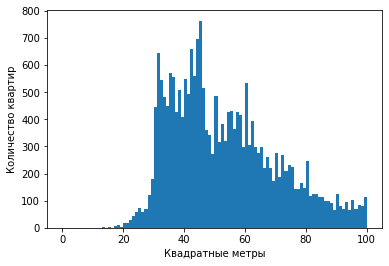

In [25]:
plt.hist(data['total_area'], bins=100, range=(0, 100))
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** В среднем общая площадь составляет 40-60 кв.м. При общей площади от 140 кв.м. количество минимальное, данные в графике отбросили.

Средняя площадь - 60 кв.м. Медиана - 52 кв.м. Максимальное значение - 900, похоже на выброс.

In [26]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

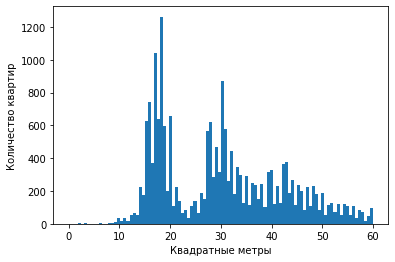

In [27]:
plt.hist(data['living_area'], bins=100, range=(0, 60))
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** В среднем жилая площадь составляет до 60 кв.м. Далее значения минимальны. Можно отметить выброс при жилой площади около 25 кв.м.

Среднее значение 34,4 кв.м., медиана - 30 кв.м. Значения приближены.

In [28]:
data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

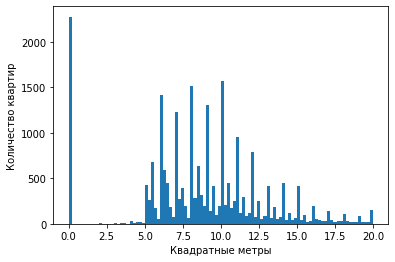

In [29]:
plt.hist(data['kitchen_area'], bins=100, range=(0, 20))
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** В среднем площадь кухни составляет 5-15 кв.м. Можно отметить выброс в значении 0. О нем писали ранее - скорее всего кухня отсутсвует (студия). Больше 20 кв.м значений практически нет. Скачки на точных значениях, такие как 6, 7, 8, 10 и т.д.

Среднее значение 9.5, медиана - 9. Практически равны.

In [30]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

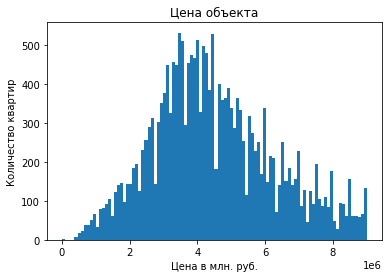

In [31]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Цена объекта')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Среднее значение стоимости объекта около 6,5 млн. Медиана - 4,65. Возможно есть необасновано завышенные цены за квартиры, либо же наоборот.

In [32]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

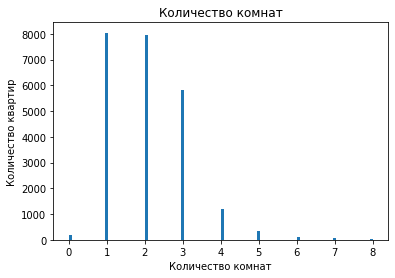

In [53]:
plt.hist(data['rooms'], bins=100, range=(0, 8))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Среднее значение количества комнат - 2. Медиана также 2. Большая часть продаваемых квартир - 1,2 или 3-х комнатные.

In [34]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

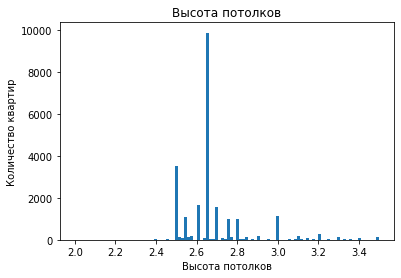

In [54]:
plt.hist(data['ceiling_height'], bins=100, range=(2, 3.5))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Среднее значение высоты потолков - 2.7. Медиана - 2.65. Присутствуют выбросы, но небольшие.

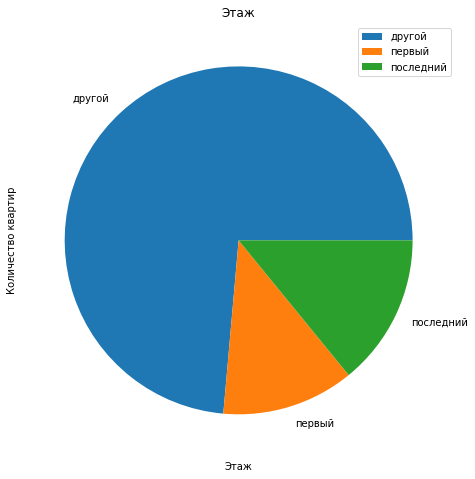

In [55]:
data_type_floor = (
    data
    .pivot_table(index='type_floor', values='last_price', aggfunc='count')
)
data_type_floor.plot(kind='pie', figsize=(8, 8), y='last_price')
plt.title('Этаж')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Большая часть квартир не относится к первому или последнему этажу. 

In [61]:
data['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

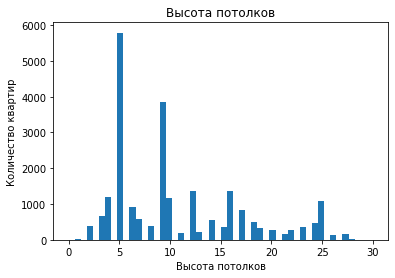

In [62]:
plt.hist(data['floors_total'], bins=50, range=(0, 30))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Среднее значение всего этажей составляет 10.6, медиана - 9. Большая часть домой с 5 этажами в данных.

In [64]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

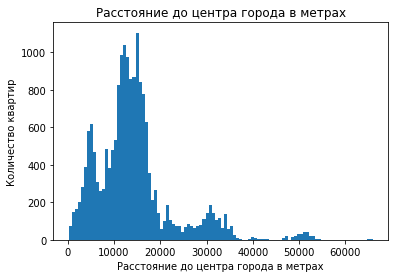

In [67]:
plt.hist(data['city_centers_nearest'], bins=100)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Среднее значение - 14191 метров, медиана - 13098. Большая часть недвижимости находится в примерно 15000 метрах от центра. Небольшое количество находится достаточно далеко от 20000 метров до центра города.

In [69]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

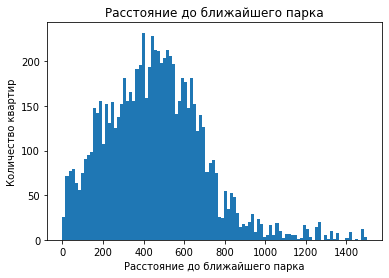

In [71]:
plt.hist(data['parks_nearest'], bins=100, range=(0, 1500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Можно отметить, что практически от каждой недвижимости ближайший парк находится достаточно рядом. Среднее значение - 490 метров, медиана - 455 метров. Значения очень близки. 

### Изучите, как быстро продавались квартиры

In [72]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

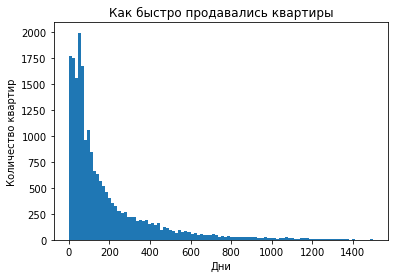

In [74]:
plt.hist(data['days_exposition'], bins=100, range=(0, 1500))
plt.title('Как быстро продавались квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show() 

**Вывод:** Среднее значение 180 дней. Медиана - 95 дней. Разница большая. Можно отметить по графику, что большая часть квартир продается до примернео 150 дней. Остальные - достаточно долго продаются. Есть объявления, которым больше года (возможно уже просто неактуальные). Третий квартиль 232 дня. Остальные можно считать выбросами.

### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

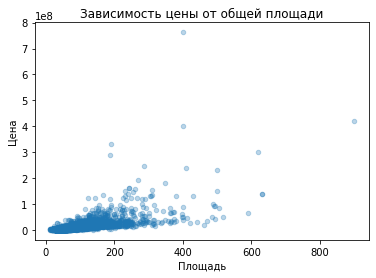

In [99]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3) 
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show() 

In [97]:
data['total_area'].corr(data['last_price'])

0.6536750579657242

**Вывод:** Корреляция составляет 0.65. Можно согласиться, что некоторая зависимость есть. Чем больше общая площадь, тем выше стоимость объекта.

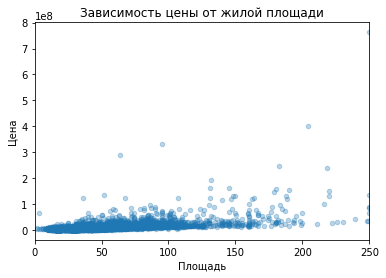

In [135]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3) 
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.xlim(0, 250)
plt.show() 

In [103]:
data['living_area'].corr(data['last_price'])

0.5664915336952651

**Вывод:** Корреляция составляет 0.57. Можно согласиться, что некоторая зависимость есть. Чем больше жилая площадь, тем выше стоимость объекта.

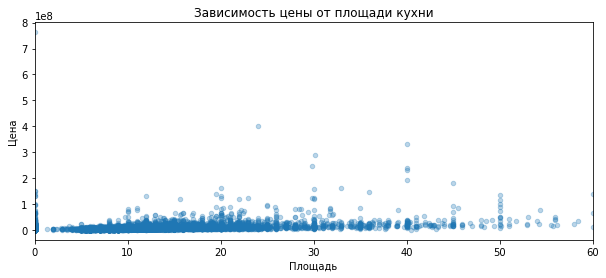

In [136]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 4)) 
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.xlim(0, 60)
plt.show() 

In [111]:
data['kitchen_area'].corr(data['last_price'])

0.3864437841938422

**Вывод:** Корреляция составляет 0.38. Близка к нулю. Зависимости практически нет между стоимостью объекта и площадью кухни.

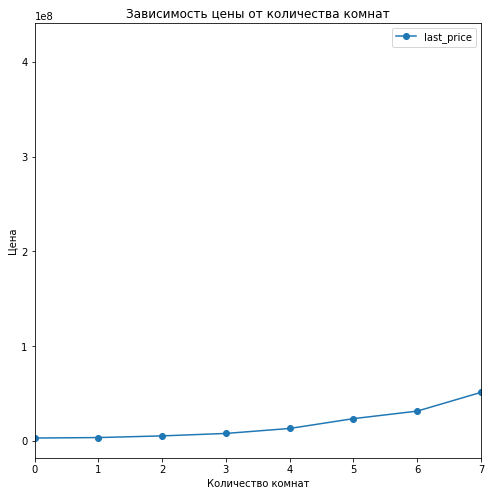

In [177]:
data_rooms = (
    data
    .pivot_table(index='rooms', values='last_price')
)
data_rooms.plot(figsize=(8, 8), y='last_price', style='o-')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.xlim(0, 7)
plt.show() 

In [178]:
data['rooms'].corr(data['last_price'])

0.3633428499648948

**Вывод:** Корреляция составляет 0,36. Некоторая зависимость присутствует.

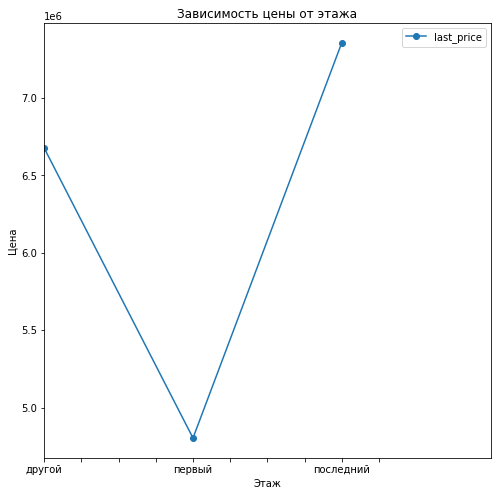

In [179]:
data_type_floor = (
    data
    .pivot_table(index='type_floor', values='last_price')
)
data_type_floor.plot(figsize=(8, 8), y='last_price', style='o-')
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.xlim(0, 3)
plt.show() 

In [180]:
data['floor'].corr(data['last_price'])

0.026575643284470797

**Вывод:** Закономерность присутствует. У квартир на первом этаже наблюдается наименьшая стоимость. Корреляция же практитчески равна 0 (при рассмотрении этажа) - 0,026.

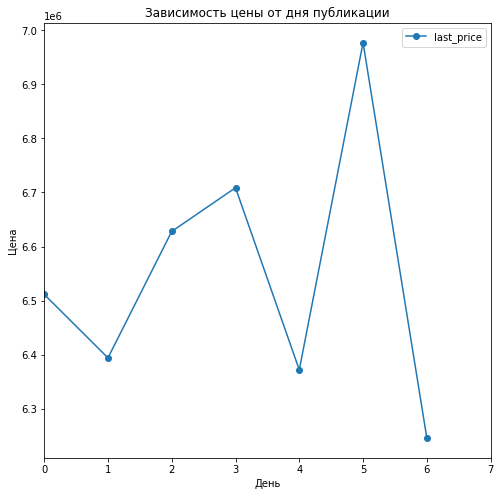

In [181]:
data_day_of_week = (
    data
    .pivot_table(index='day_of_week', values='last_price')
)
data_day_of_week.plot(figsize=(8, 8), y='last_price', style='o-')
plt.title('Зависимость цены от дня публикации')
plt.xlabel('День')
plt.ylabel('Цена')
plt.xlim(0, 7)
plt.show() 

In [158]:
data['day_of_week'].corr(data['last_price'])

0.0015501452176215405

**Вывод:** Зависимости практически не. Корреляция составляет 0.001. Можно лишь отметить по графику, что в пятницу выставляли наиболее дорогие объявления.

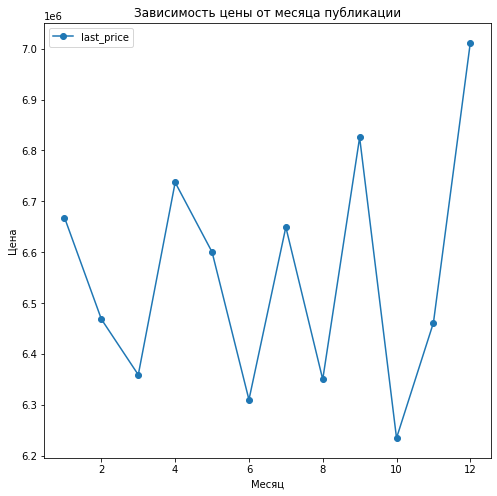

In [191]:
data_month = (
    data
    .pivot_table(index='month', values='last_price')
)
data_month.plot(figsize=(8, 8), y='last_price', style='o-')
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.xlim(0, 12)
plt.show() 

In [187]:
data['month'].corr(data['last_price'])

0.0027791287507397166

**Вывод:** Корреляция зависимости цены от месяца объявления составляет 0.002. Практически равна нулю. ПО графику можно отметить, что дорогие объявления были в конце года. Прямой зависимости нет.

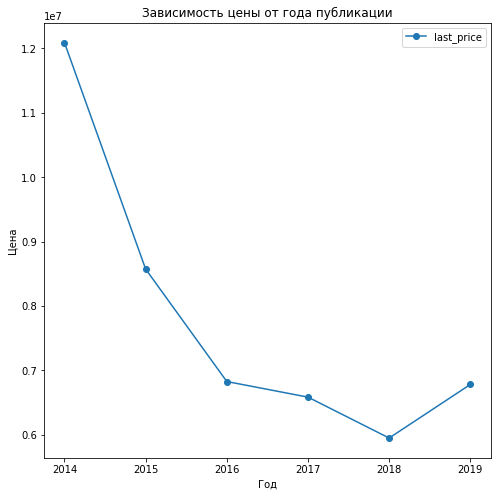

In [193]:
data_year = (
    data
    .pivot_table(index='year', values='last_price')
)
data_year.plot(figsize=(8, 8), y='last_price', style='o-')
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show() 

In [189]:
data['year'].corr(data['last_price'])

-0.043089036199508615

**Вывод:** Корреляция зависимости года выставления объявления и стоимости составляет -0.04. Можно сказать, что чем новее объявление тем возможно ниже стоимость. Может быть связано с каким-либо экономическим явлением.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [235]:
data_top = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
data_top = data_top.sort_values('last_price', ascending=False).head(10)
data_top

,last_price
locality_name,
санкт-петербург,15721
посёлок мурино,590
кудрово,472
посёлок шушары,440
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307


In [239]:
data_top['price_of_one_square'] =  data.pivot_table(index='locality_name', values='price_of_one_square', aggfunc='mean')
data_top = data_top.sort_values('price_of_one_square', ascending=False)
data_top

,last_price,price_of_one_square
locality_name,,
санкт-петербург,15721,114849.008793
пушкин,369,103125.819377
кудрово,472,95324.930508
посёлок парголово,327,90175.913089
посёлок мурино,590,86087.512017
посёлок шушары,440,78677.364318
колпино,338,75424.579112
гатчина,307,68746.146515
всеволожск,398,68654.473970


**Вывод:** Топ списка по количеству объявлений и стоимости 1 квадратного метра занимает Санкт-Петербург. Далее идет Пушкин и Кудрово. Наименьшая стоимость квадратного метра в Выборг - 58141.

### Выделите квартиры в Санкт-Петербурге и вычислите их среднюю стоимость на разном удалении от центра

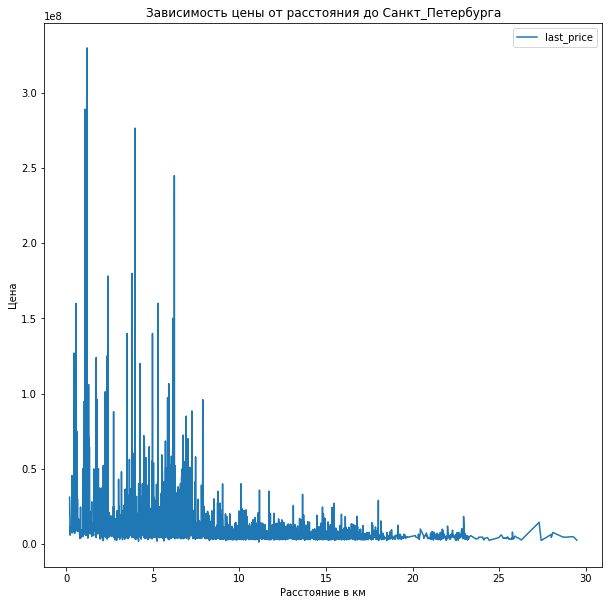

In [267]:
(
    data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center_km', values='last_price')
    .plot(style='-', figsize=(10, 10))
)
plt.title('Зависимость цены от расстояния до Санкт_Петербурга')
plt.ylabel('Цена')
plt.xlabel('Расстояние в км')
plt.show()

**Вывод:** Можно отметить, что чем ближе квартира к центру, тем выше стоимость. И наоборот соответственно.

## Общий вывод

1.	Загрузили  данные из csv-файла в датафрейм c помощью библиотеки pandas
2.	Изучили общую информацию о полученном датафрейме
3.	Построили гистограмму для всех числовых столбцов таблицы на одном графике
4.	Нашли и изучили пропущенные значения в столбцах
5. Рассмотрели типы данных в каждом столбце и преобразовали, где необходимо
6. Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты
7. Добавили в таблицу новые столбцы:цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах
8. Провели исследовательский анализ данных
9. Изучили перечисленные параметры объектов и построили отдельные гистограммы для каждого из этих параметров.
- Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

**Данные по квартирам:**

В среднем общая площадь составляет 40-60 кв.м. При общей площади от 140 кв.м. количество минимальное, данные в графике отбросили.

Средняя площадь - 60 кв.м. Медиана - 52 кв.м. Максимальное значение - 900, похоже на выброс.

В среднем жилая площадь составляет до 60 кв.м. Далее значения минимальны. Можно отметить выброс при жилой площади около 25 кв.м.

Среднее значение 34,4 кв.м., медиана - 30 кв.м. Значения приближены.

В среднем площадь кухни составляет 5-15 кв.м. Можно отметить выброс в значении 0. О нем писали ранее - скорее всего кухня отсутсвует (студия). Больше 20 кв.м значений практически нет. Скачки на точных значениях, такие как 6, 7, 8, 10 и т.д.
Среднее значение 9.5, медиана - 9. Практически равны.

Среднее значение стоимости объекта около 6,5 млн. Медиана - 4,65. Возможно есть необасновано завышенные цены за квартиры, либо же наоборот.

Среднее значение количества комнат - 2. Медиана также 2. Большая часть продаваемых квартир - 1,2 или 3-х комнатные. Среднее значение высоты потолков - 2.7. Медиана - 2.65. Присутствуют выбросы, но небольшие. 

Большая часть квартир не относится к первому или последнему этажу. 

Среднее значение всего этажей составляет 10.6, медиана - 9. Большая часть домов с 5 этажами в данных. 

Большая часть недвижимости находится в примерно 15000 метрах от центра. Небольшое количество находится достаточно далеко от 20000 метров до центра города. 

Можно отметить, что практически от каждой недвижимости ближайший парк находится достаточно рядом. Среднее значение - 490 метров, медиана - 455 метров. Значения очень близки.


10. Изучили, как быстро продавались квартиры

Среднее значение 180 дней. Медиана - 95 дней. Разница большая. Можно отметить по графику, что большая часть квартир продается до примернео 150 дней. Остальные - достаточно долго продаются. Есть объявления, которым больше года (возможно уже просто неактуальные). Третий квартиль 232 дня. Остальные можно считать выбросами.

11. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построили сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра.
 
Топ списка по количеству объявлений и стоимости 1 квадратного метра занимает Санкт-Петербург. Далее идет Пушкин и Кудрово. Наименьшая стоимость квадратного метра в Выборг - 58141.

12. Выделили квартиры в Санкт-Петербурге и вычислили их среднюю стоимость на разном удалении от центра

Можно отметить, что чем ближе квартира к центру, тем выше стоимость. И наоборот соответственно.
